<a href="https://colab.research.google.com/github/carlosrivero24-sys/Inteligencia_Artificial/blob/main/CNN/Clasificai%C3%B3n_de_ropa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Softmax
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
#Importamos todas las libreias que ocuparemos desde el principio para que tenga mejor vista nuestro codigo estan nuestra red, esta para tener nuestra matriz de confusión, nuestro optimizador Adam nuestas capas densas etc

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
#Cargamos nuestro conjuto de datos fashion_mnist

In [3]:
fashion_mnist.load_data
#Ocupamos el.load_data para ver las caracteristicas de fashion_mnist

<function keras.src.datasets.fashion_mnist.load_data()>

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
               #Le damos el nombre de class_names a nuestras columnas o nombre de nuestras etiquetas

In [5]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
#En este data set ya viene por defecto el conjunto de prueba y el conjunto de entrenamienro entonces ya solo colocamos el codigo asi

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
index = 0
image = train_images[index]
label = train_labels[index]
#A nuestro train_images le vamos a poner el indice fijado en este caso es 0 e igual lo haremos con train_labels

In [7]:
print(image)
#Le pedimos que nos imprima image

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

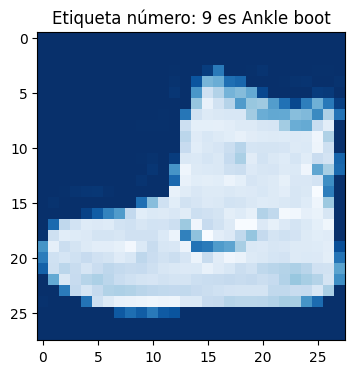

In [8]:
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap=plt.cm.Blues_r)
plt.title(f'Etiqueta número: {label} es {class_names[label]}')
plt.show()
#Esta linea solo es la grafica que nos dice el tamaño de la grafica el color pero este va a incluir el label que es el numero de la etiqueta y el nombre de la etiqueta

In [9]:
print(train_images.shape)
print(test_images.shape)
#Nos imprime el numero de filas y columnas de train_images y test_images

(60000, 28, 28)
(10000, 28, 28)


In [10]:
# Normalizar las imágenes para que los valores estén en el rango [0, 1] dividiendolo con el maximo
train_images = train_images / 255.0
test_images = test_images / 255.0

In [11]:
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), #Este aplica 32 filtros de un tamaño de 3*3
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'), #Esta segunda capa aplica 64 filtros igual con un tamaño de 3*3
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'), #Tercer capa aplica 64 filtros con un tamaño de 3*3
    Flatten(),#Aplana los datos a un vector de 576
    Dense(64, activation='relu'),#Reducción de dimensionalidad y aprendizaje de patrones globales.
    Dense(10) #Capa de Salida final con 10 unidades (una para cada clase de Fashion MNIST).
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)
#Con nuestro optimizador Adam le pedimos una taza de aprendizaje 0.001

In [13]:
model.compile(optimizer=adam_optimizer,
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#Se compila el modelo utilizando el optimizador Adam y la función de pérdida de entropía cruzada categórica dispersa (sparse_categorical_crossentropy) para la clasificación.

In [14]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
#Entrenamos nuestro modelo con 10 epocas, se obtiene la perdida y la precisión

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.7406 - loss: 0.7045 - val_accuracy: 0.8659 - val_loss: 0.3782
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8764 - loss: 0.3403 - val_accuracy: 0.8846 - val_loss: 0.3219
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8938 - loss: 0.2903 - val_accuracy: 0.8892 - val_loss: 0.3002
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9084 - loss: 0.2496 - val_accuracy: 0.8994 - val_loss: 0.2722
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9180 - loss: 0.2229 - val_accuracy: 0.9028 - val_loss: 0.2789
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9242 - loss: 0.2023 - val_accuracy: 0.9074 - val_loss: 0.2590
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9312 - loss: 0.1839 - val_accuracy: 0.9010 - val_loss: 0.2801
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9376 - loss: 0.1662 -

In [15]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9063 - loss: 0.2896


In [16]:
probability_model = Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
#Se predice el modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [17]:
# Calcular matriz de confusión
cm = confusion_matrix(test_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

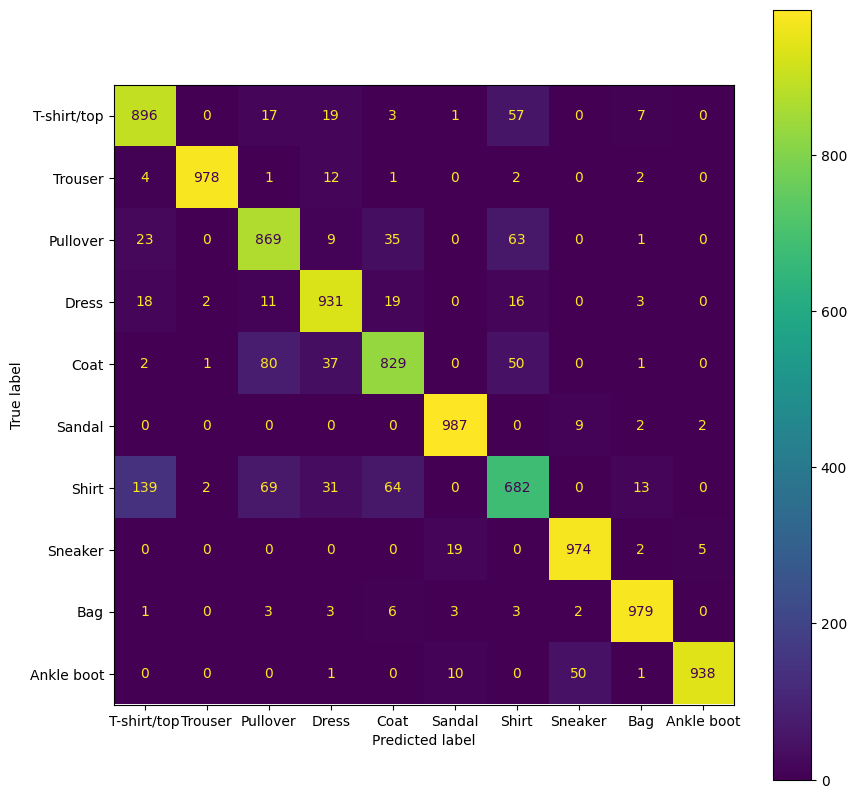

In [18]:
# Graficar matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.show()

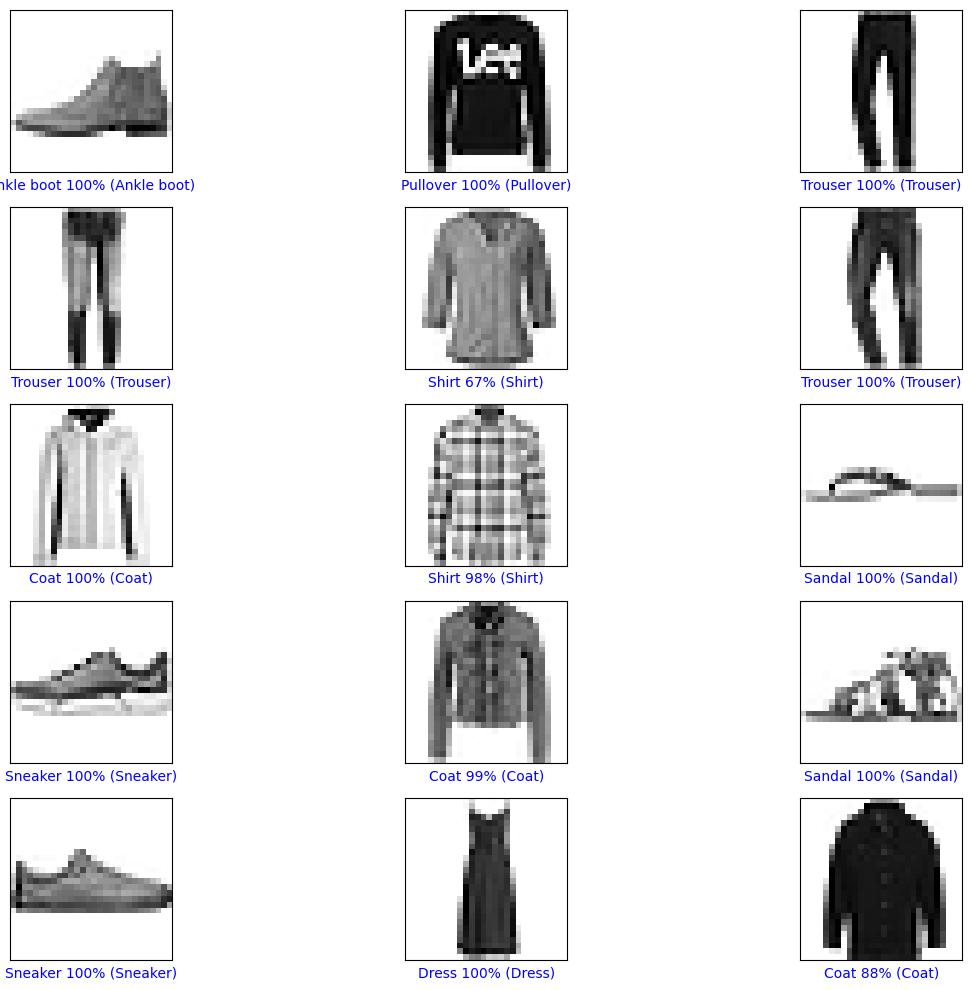

In [19]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape((28, 28)), cmap=plt.cm.binary)

    predicted_label = tf.argmax(predictions_array).numpy()
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*tf.reduce_max(predictions_array).numpy(),
                                         class_names[true_label]),
                                         color=color)

# Graficar algunas predicciones
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)

plt.tight_layout()
plt.show()